<h1>Part 1 - Exploratory Data Analysis</h1>

The attached login.json file contains (simulated) timestamps of user logins in a particular geographic location.

Aggregate these logins counts based on 15-minute time intervals

Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand 

Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [4]:
df.set_index('login_time', inplace=True)

In [5]:
df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [6]:
df['count'] = 1

# Resample in 15minute time interval
df_15T = df.resample('15T', how='sum')

C:\Users\RAHUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  after removing the cwd from sys.path.


In [7]:
df_15T.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Text(0, 0.5, 'Number of logins')

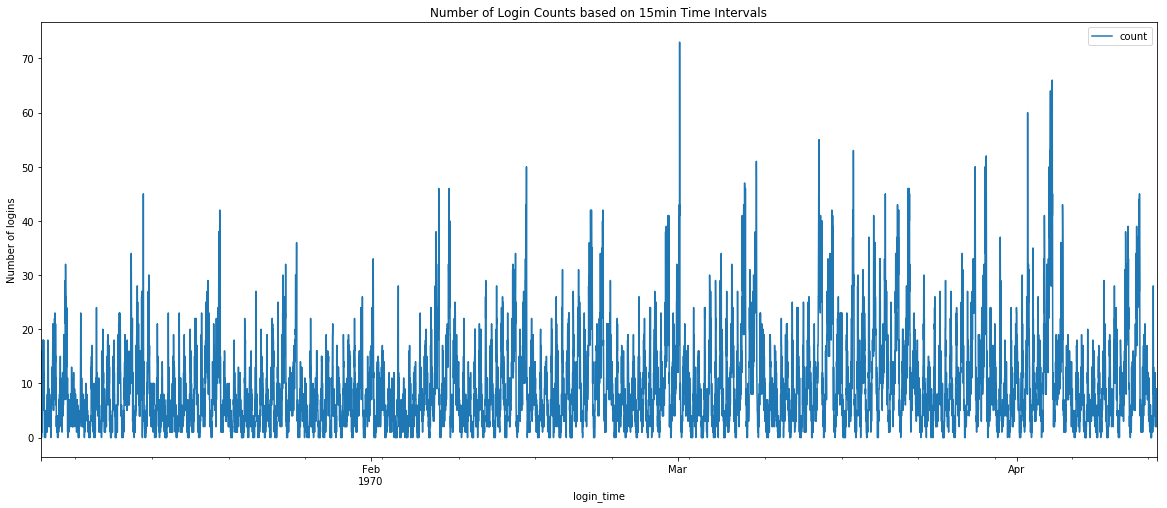

In [8]:
df_15T.plot(figsize = (20, 8), title = 'Number of Login Counts based on 15min Time Intervals')
plt.ylabel('Number of logins')

In [9]:
df_15T.reset_index(inplace=True)

In [10]:
df_months = df_15T.groupby(df_15T['login_time'].dt.strftime('%B'))['count'].sum().sort_values()

In [11]:
df_months.head()

login_time
April       13507
January     21239
February    24673
March       33723
Name: count, dtype: int64

In [12]:
df = df.reset_index()

In [13]:
df.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [14]:
df['hour'] = df['login_time'].apply(lambda d: d.hour)
df['weekday'] = df['login_time'].apply(lambda d: d.weekday())

In [15]:
df['date'] = df['login_time'].apply(lambda d: dt.date(d.year, d.month, d.day))

In [16]:
df.head()

,login_time,count,hour,weekday,date
0,1970-01-01 20:13:18,1,20,3,1970-01-01
1,1970-01-01 20:16:10,1,20,3,1970-01-01
2,1970-01-01 20:16:37,1,20,3,1970-01-01
3,1970-01-01 20:16:36,1,20,3,1970-01-01
4,1970-01-01 20:26:21,1,20,3,1970-01-01


<h1>15min Interval and Day Intervals</h1>

In [17]:
by_date = df['date'].value_counts().sort_index()
by_date = by_date.reset_index()
by_date.head()

,index,date
0,1970-01-01,112
1,1970-01-02,681
2,1970-01-03,793
3,1970-01-04,788
4,1970-01-05,459


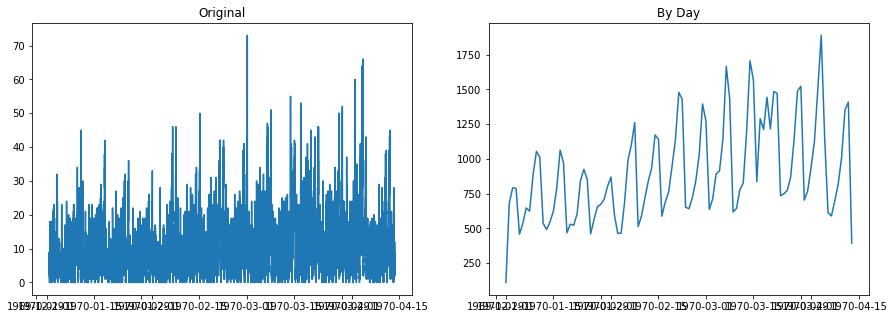

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5));
axes[0].plot('login_time', 'count', data = df_15T);
axes[0].set_title('Original');
axes[1].plot('index', 'date', data = by_date);
axes[1].set_title('By Day');

plt.show()

In [19]:
by_date

,index,date
0,1970-01-01,112
1,1970-01-02,681
2,1970-01-03,793
3,1970-01-04,788
4,1970-01-05,459
5,1970-01-06,536
6,1970-01-07,648
7,1970-01-08,625
8,1970-01-09,881
9,1970-01-10,1054


In [20]:
january = df_15T[(df_15T['login_time'] > '1970-01') & (df_15T['login_time'] < '1970-02')]
january.describe()

,count
count,2896.000000
mean,7.333909
std,6.099863
min,0.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,45.000000


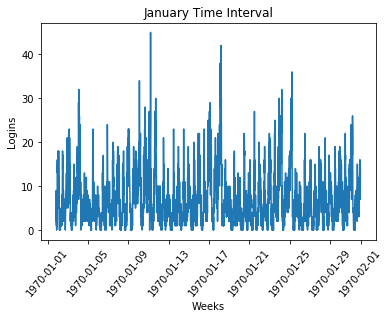

In [21]:
x = january['login_time']
y = january['count']
plt.plot(x, y)
plt.title('January Time Interval')
plt.xticks(rotation = 50)
plt.xlabel("Weeks")
plt.ylabel("Logins")
plt.show()

In [22]:
february = df_15T[(df_15T['login_time'] > '1970-02') & (df_15T['login_time'] < '1970-03')]
february.describe()

,count
count,2687.000000
mean,9.177894
std,7.797917
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,50.000000


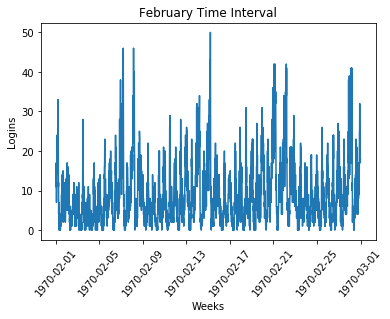

In [23]:
# Plot February Logins
x = february['login_time']
y = february['count']
plt.plot(x, y)
plt.title('February Time Interval')
plt.xticks(rotation = 50)
plt.xlabel("Weeks")
plt.ylabel("Logins")
plt.show()

In [24]:
march = df_15T[(df_15T['login_time'] > '1970-03') & (df_15T['login_time'] < '1970-04')]
march.describe()

,count
count,2975.000000
mean,11.330084
std,9.336997
min,0.000000
25%,4.000000
50%,9.000000
75%,16.000000
max,73.000000


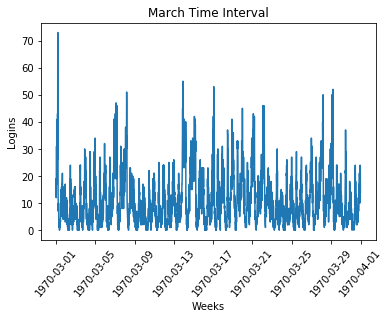

In [25]:
# Plot February Logins
x = march['login_time']
y = march['count']
plt.plot(x, y)
plt.title('March Time Interval')
plt.xticks(rotation = 50)
plt.xlabel("Weeks")
plt.ylabel("Logins")
plt.show()

In [26]:
april = df_15T[(df_15T['login_time'] > '1970-04') ]
april.describe()

,count
count,1227.000000
mean,10.995925
std,9.973251
min,0.000000
25%,4.000000
50%,8.000000
75%,15.000000
max,66.000000


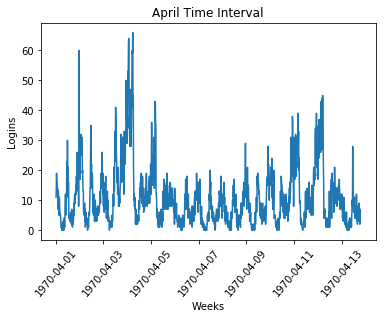

In [27]:
# Plot April Logins
x = april['login_time']
y = april['count']
plt.plot(x, y)
plt.title('April Time Interval')
plt.xticks(rotation = 50)
plt.xlabel("Weeks")
plt.ylabel("Logins")

plt.show()

In [28]:
df_15T['weekday'] = df_15T['login_time'].dt.dayofweek
df_weekday = df_15T.sort_values(by='count', ascending=False)
weekday_counts = df_weekday[['count', 'weekday']]
weekday_counts = weekday_counts.groupby('weekday').sum().reset_index()
weekday_counts

,weekday,count
0,0,8823
1,1,9268
2,2,10339
3,3,11960
4,4,15208
5,5,19377
6,6,18167


In [29]:
weekday_counts['weekday'] = ['Mon', 'Tues', 'Wed','Thurs','Fri', 'Sat', 'Sun']
weekday_counts = weekday_counts[['weekday','count']]
weekday_counts

,weekday,count
0,Mon,8823
1,Tues,9268
2,Wed,10339
3,Thurs,11960
4,Fri,15208
5,Sat,19377
6,Sun,18167


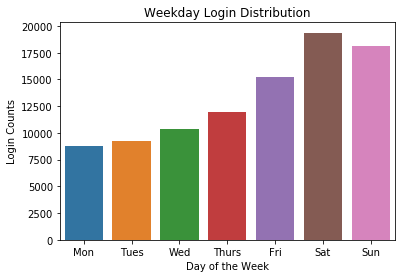

In [30]:
sns.barplot(x= 'weekday', y='count', data=weekday_counts)
plt.xlabel('Day of the Week')
plt.title('Weekday Login Distribution')
plt.ylabel('Login Counts')
plt.show()

<h1>Part 2 - Experiment and metrics design</h1>

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities by reimbursing all toll costs.

<b>Question 1</b>: What woud you choose as the key measure of success of this experiment in encouraging driver partners to server both cities, and why would you choose this metric?

<b>Question 2</b>: Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. How you will implement the experiment

b. What statistical test(s) you will conduct to verify the significance of the observation

c. How would you interpret the results and provide recommendations to the city operations team along with any caveats. 

<b>Answer 1</b>:
The most obvious metric for success will be profit, but other metrics include:
Positive User Feedback 
More traffic in cities, which may lead to indirect profit of neighboring stores or restaraunts
Increase signups and registration of users
Less wait times
There's many reasons to choose a metric, and it ultimately comes down to what the city needs. I believe that creating these tolls roads will hopefully increase the awareness about the benefits of driver partners. The goal is to save time and increase productivity

<b>Answer 2</b>:
One simple experiment that we can perform is to conduct an A/B Test. The control group would be users that do not use the toll bridge. And the test group would be users that do use the toll bridge. We'll have to keep track of the revenue gained from both sides and compare it against each other within a few months. Or if you want a more accurate reading, we can collect the data within a year's time.

A statistical test that we can use is applying a t-test, with a p-value of (0.5).
There's three ways to interpret the results. One would be if there's no increase in profit. If this happens, then we'll need to conduct more studies and see what's causing the problem. If there is no increase in profit, then we'll have to wait it out and see what else can be done. If there is profit, then we can look at what factors contributed the most to an increase in profit and maybe optimize from there.

In the end, it'll be hard to evaluate the performance of this experiment within a short period of time. This experiment will have to be monitored for a while and adjustments will have to be made yearly or periodically at the least.

<h1>Part 3 - Predictive modeling</h1>

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. 

Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

Data description
<b>city</b>: city this user signed up in

<b>phone</b>: primary device for this user

<b>signup_date</b>: date of account registration; in the form ‘YYYY MM DD’

<b>last_trip_date</b>: the last time this user completed a trip; in the form ‘YYYY MM DD’

<b>avg_dist</b>: the average distance in miles per trip taken in the first 30 days after signup

<b>avg_rating_by_driver</b>: the rider’s average rating over all of their trips

<b>avg_rating_of_driver</b>: the rider’s average rating of their drivers over all of their trips

<b>surge_pct</b>: the percent of trips taken with surge multiplier > 1

<b>avg_surge</b>: The average surge multiplier over all of this user’s trips

<b>trips_in_first_30_days</b>: the number of trips this user took in the first 30 days after signing up

<b>ultimate_black_user</b>: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

<b>weekday_pct</b>: the percent of the user’s trips occurring during a weekday

In [31]:
import json

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()

Types of Variables:

Numerical Variables: 7
<br>Categorical Variables: 3
<br>Ordinal Date Variables: 2

In [32]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


<h1>Exploratory Data Analysis</h1>

In [33]:
df.dtypes

avg_dist                  float64
avg_rating_by_driver      float64
avg_rating_of_driver      float64
avg_surge                 float64
city                       object
last_trip_date             object
phone                      object
signup_date                object
surge_pct                 float64
trips_in_first_30_days      int64
ultimate_black_user          bool
weekday_pct               float64
dtype: object

In [34]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


Check missing values

avg_rating_by_driver (impute missing value with 5)

avg_rating_of_driver (imput missing value with 5)
phone 

In [35]:
df.count()

avg_dist                  50000
avg_rating_by_driver      49799
avg_rating_of_driver      41878
avg_surge                 50000
city                      50000
last_trip_date            50000
phone                     49604
signup_date               50000
surge_pct                 50000
trips_in_first_30_days    50000
ultimate_black_user       50000
weekday_pct               50000
dtype: int64

<h1>Convert dates into datetime objects</h1>

In [36]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [37]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

<h1>Check the last date and create the label 'active_30'</h1>
The last date in the dataset is July 1, 2014. So we can create a label for active users that fall within June 1 - July 1

In [38]:
df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [39]:
# Create a new column and set its values to nan
df['active_30'] = np.nan

In [40]:
# Active users will have a value of 1 if they were active within the past 30 days
df.loc[df['last_trip_date'] >= "2014-06-01", "active_30"] = 1

In [41]:
# Inactive users otherwise
df.loc[df['last_trip_date'] < "2014-06-01", "active_30"] = 0

In [42]:
df.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_30
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.0,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0


In [43]:
df['active_30'] = df['active_30'].convert_objects(convert_numeric=True)

C:\Users\RAHUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


<b>Check proportion of active to inactive users</b>

<b>Summary</b>:

Looks like about 37.6% of users are active in the dataset

This can be seen as a class imbalance problem.

The most correlated features associated with active users are 'trips_in_first_30_days' and 'ultimate_black_user

In [44]:
df['active_30'].value_counts()

0.0    31196
1.0    18804
Name: active_30, dtype: int64

In [45]:
df['active_30'].value_counts(True)

0.0    0.62392
1.0    0.37608
Name: active_30, dtype: float64

In [46]:
# Overview of summary (Active V.S. Non-Active)
turnover_Summary = df.groupby('active_30')
turnover_Summary.mean()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
active_30,,,,,,,,
0.0,6.207939,4.787464,4.607557,1.075339,8.666739,1.658482,0.299942,60.647032
1.0,5.114788,4.762772,4.592930,1.073809,9.152797,3.306318,0.505052,61.389034


Correlation Matrix and Heatmap

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_30
avg_dist,1.000000,0.080540,0.034509,-0.081491,-0.104414,-0.136329,0.032310,0.101652,-0.092780
avg_rating_by_driver,0.080540,1.000000,0.123175,0.010597,0.020103,-0.039115,0.009343,0.020442,-0.026791
avg_rating_of_driver,0.034509,0.123175,1.000000,-0.026189,-0.003899,-0.011302,-0.002086,0.014630,-0.011653
avg_surge,-0.081491,0.010597,-0.026189,1.000000,0.793582,-0.001841,-0.078791,-0.110071,-0.003333
surge_pct,-0.104414,0.020103,-0.003899,0.793582,1.000000,0.005720,-0.106861,-0.144918,0.011797
trips_in_first_30_days,-0.136329,-0.039115,-0.011302,-0.001841,0.005720,1.000000,0.112210,0.050388,0.210463
ultimate_black_user,0.032310,0.009343,-0.002086,-0.078791,-0.106861,0.112210,1.000000,0.035998,0.205002
weekday_pct,0.101652,0.020442,0.014630,-0.110071,-0.144918,0.050388,0.035998,1.000000,0.009693
active_30,-0.092780,-0.026791,-0.011653,-0.003333,0.011797,0.210463,0.205002,0.009693,1.000000


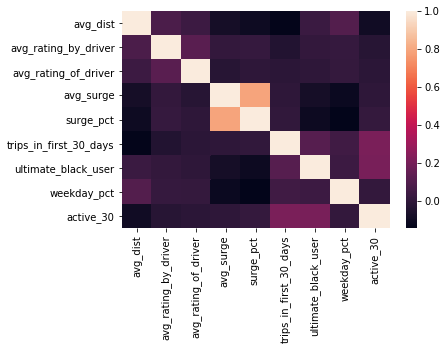

In [47]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

<b>Create New Features ('Signup 'Day')</b>

In [48]:
df['signup_day'] = df['signup_date'].dt.day

In [49]:
df.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_30,signup_day
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0,25
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0,29
2,0.77,5.0,4.3,1.0,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0,6


Pre-Processing Requirements:

Convert Categorical Variables Accordingly (city, phone, ultimate_black_user)
<br>Scale all numerical features?

In [50]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_30,signup_day
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0,25
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0,29
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0,6
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0,10
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0,27


Data Imputation (Fill in Missing Values)
We filled in the average ratings with 5's because it's the most common value in the dataset. As for phones, I imputed 'none' because some people may not have either an iPhone or Android.

In [51]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(5)

In [52]:
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(5)

In [53]:
df['phone'] = df['phone'].fillna('none')

In [54]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_30,signup_day
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0,25
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0,29
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0,6
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0,10
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0,27


Pre-Processing (OneHotEncoding)
<br><br>Convert these categorical variables using OneHotEncoding:
<br>city
<br>phone
<br>ultimate_black_user
<br>signup_month
<br>signup_day

In [55]:
newdf = pd.get_dummies(df, columns=['city', 'ultimate_black_user', 'phone', 'signup_day'], drop_first=True)

In [56]:
newdf.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,active_30,...,signup_day_22,signup_day_23,signup_day_24,signup_day_25,signup_day_26,signup_day_27,signup_day_28,signup_day_29,signup_day_30,signup_day_31
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,46.2,1.0,...,0,0,0,1,0,0,0,0,0,0
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,50.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,100.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,80.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,82.4,0.0,...,0,0,0,0,0,1,0,0,0,0


In [57]:
newdf.drop(['last_trip_date', 'signup_date'], axis=1, inplace=True)

In [58]:
target_name = 'active_30'
X = newdf.drop('active_30', axis=1)


y=newdf[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [59]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

---Base Model---
Base Rate AUC = 0.50
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.77      4679
         1.0       0.00      0.00      0.00      2821

   micro avg       0.62      0.62      0.62      7500
   macro avg       0.31      0.50      0.38      7500
weighted avg       0.39      0.62      0.48      7500



C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)




 ---Logistic Model---
Logistic AUC = 0.69
              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      4679
         1.0       0.59      0.66      0.62      2821

   micro avg       0.70      0.70      0.70      7500
   macro avg       0.68      0.69      0.69      7500
weighted avg       0.71      0.70      0.70      7500



In [61]:
# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))




 ---Decision Tree Model---
Decision Tree AUC = 0.75
              precision    recall  f1-score   support

         0.0       0.83      0.76      0.80      4679
         1.0       0.65      0.75      0.70      2821

   micro avg       0.76      0.76      0.76      7500
   macro avg       0.74      0.75      0.75      7500
weighted avg       0.77      0.76      0.76      7500



In [62]:
# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))




 ---Random Forest Model---
Random Forest AUC = 0.76
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82      4679
         1.0       0.71      0.69      0.70      2821

   micro avg       0.78      0.78      0.78      7500
   macro avg       0.76      0.76      0.76      7500
weighted avg       0.78      0.78      0.78      7500



<h1>Conclusion </h1>
    
I used three types of algorithms for my predictive model (Logistic Regression, Random Forest, Decision Tree). It's no surprise that the more sophisticated models like Random Forest performed better than its counterparts. With F1-Score of about 75-78%.


Increase operations in King's Landing as they tend to have greater probability of conversion. Alternatively, discover what is unique about King's Landing drivers and passengers and check if it can be implemented in the other cities.